___Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) 
& all other variable will be independent in the analysis.___

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
df_company = pd.read_csv('Company_Data(RF).csv')
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [61]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [62]:
df_company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [63]:
# Converting Sales feature into categorical type

sales_category = pd.cut(df_company.Sales, bins=[0, 5.39, 9.32, 16.27], labels=['low', 'moderate', 'high'])
df_company.insert(0, 'Sales_category', sales_category)
df_company.drop(['Sales'], axis=1, inplace=True)

df_company

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,moderate,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,moderate,139,23,3,37,120,Medium,55,11,No,Yes
397,moderate,162,26,12,368,159,Medium,40,18,Yes,Yes
398,moderate,100,79,7,284,95,Bad,50,12,Yes,Yes


In [64]:
df_company['ShelveLoc'], class_names = pd.factorize(df_company['ShelveLoc'])
df_company.ShelveLoc

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [65]:
df_company['Urban'], class_names2 = pd.factorize(df_company['Urban'])
df_company.Urban

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    1
397    0
398    0
399    0
Name: Urban, Length: 400, dtype: int64

In [66]:
df_company['US'].replace(to_replace=['Yes', 'No'], value=['0', '1'], inplace=True)
df_company.US

0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: object

In [67]:
df_company.head()

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1


In [69]:
df_company.isna().sum()

Sales_category    1
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
dtype: int64

In [70]:
df_company.dropna(inplace=True)

In [71]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales_category  399 non-null    category
 1   CompPrice       399 non-null    int64   
 2   Income          399 non-null    int64   
 3   Advertising     399 non-null    int64   
 4   Population      399 non-null    int64   
 5   Price           399 non-null    int64   
 6   ShelveLoc       399 non-null    int64   
 7   Age             399 non-null    int64   
 8   Education       399 non-null    int64   
 9   Urban           399 non-null    int64   
 10  US              399 non-null    object  
dtypes: category(1), int64(9), object(1)
memory usage: 34.8+ KB


#### Outlier detection using isoation forest

In [96]:
from sklearn.ensemble import IsolationForest

In [97]:
df_copy = df_company.copy()
data_encoded = pd.get_dummies(df_copy)

In [99]:
# training the model, isolation forest

clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [100]:
# predictions

y_pred_outliers = clf.predict(data_encoded)
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0


In [101]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:14])
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0,0.095616,1
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0,0.086739,1
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0,0.110598,1
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0,0.134853,1
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1,0.074690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0,0.102631,1
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0,0.080479,1
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0,0.070422,1
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0,0.115920,1


In [102]:
# Print the outlier data points

data_encoded[data_encoded['anomaly']==-1]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
42,77,69,0,25,24,2,50,18,0,0,0,1,0,1,-0.036655,-1
75,88,111,23,480,92,0,36,16,1,0,1,0,1,0,-0.002801,-1
229,98,104,0,404,72,2,27,18,1,0,0,1,0,1,-0.016184,-1
367,95,106,0,256,53,1,52,17,0,0,0,1,0,1,-0.010730,-1


In [103]:
df_company.drop([42, 75, 229, 367], inplace=True)
df_company

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,0,0
396,moderate,139,23,3,37,120,2,55,11,1,0
397,moderate,162,26,12,368,159,2,40,18,0,0
398,moderate,100,79,7,284,95,0,50,12,0,0


### Model building (Random forest)

In [104]:
# Splitting data into feature and class

X = df_company.iloc[:, 1:]
Y = df_company['Sales_category']
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [105]:
Y

0          high
1          high
2          high
3      moderate
4           low
         ...   
395        high
396    moderate
397    moderate
398    moderate
399        high
Name: Sales_category, Length: 395, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [106]:
# Split the data into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [109]:
# Model

num_trees = 100
max_features = 6
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, criterion = "entropy", oob_score=True)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.6988461538461539


In [110]:
# Prediction on test data

model.fit(x_train, y_train)

pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, pred_test)

acc_test

0.6582278481012658

In [111]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_test)
confusion

array([[10,  0,  9],
       [ 0,  9, 11],
       [ 5,  2, 33]], dtype=int64)

### Plot decision tree

[Text(308.7012362637363, 778.3363636363636, 'Price <= 89.5\nentropy = 1.429\nsamples = 202\nvalue = [66, 73, 177]\nclass = high'),
 Text(55.18681318681319, 704.209090909091, 'ShelveLoc <= 0.5\nentropy = 0.834\nsamples = 23\nvalue = [25, 0, 9]\nclass = low'),
 Text(24.52747252747253, 630.0818181818181, 'Urban <= 0.5\nentropy = 0.65\nsamples = 4\nvalue = [1, 0, 5]\nclass = high'),
 Text(12.263736263736265, 555.9545454545455, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 5]\nclass = high'),
 Text(36.791208791208796, 555.9545454545455, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = low'),
 Text(85.84615384615385, 630.0818181818181, 'Education <= 15.5\nentropy = 0.592\nsamples = 19\nvalue = [24, 0, 4]\nclass = low'),
 Text(61.31868131868132, 555.9545454545455, 'CompPrice <= 97.0\nentropy = 0.276\nsamples = 13\nvalue = [20, 0, 1]\nclass = low'),
 Text(49.05494505494506, 481.8272727272727, 'Population <= 339.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = low'),
 Text(36.7912

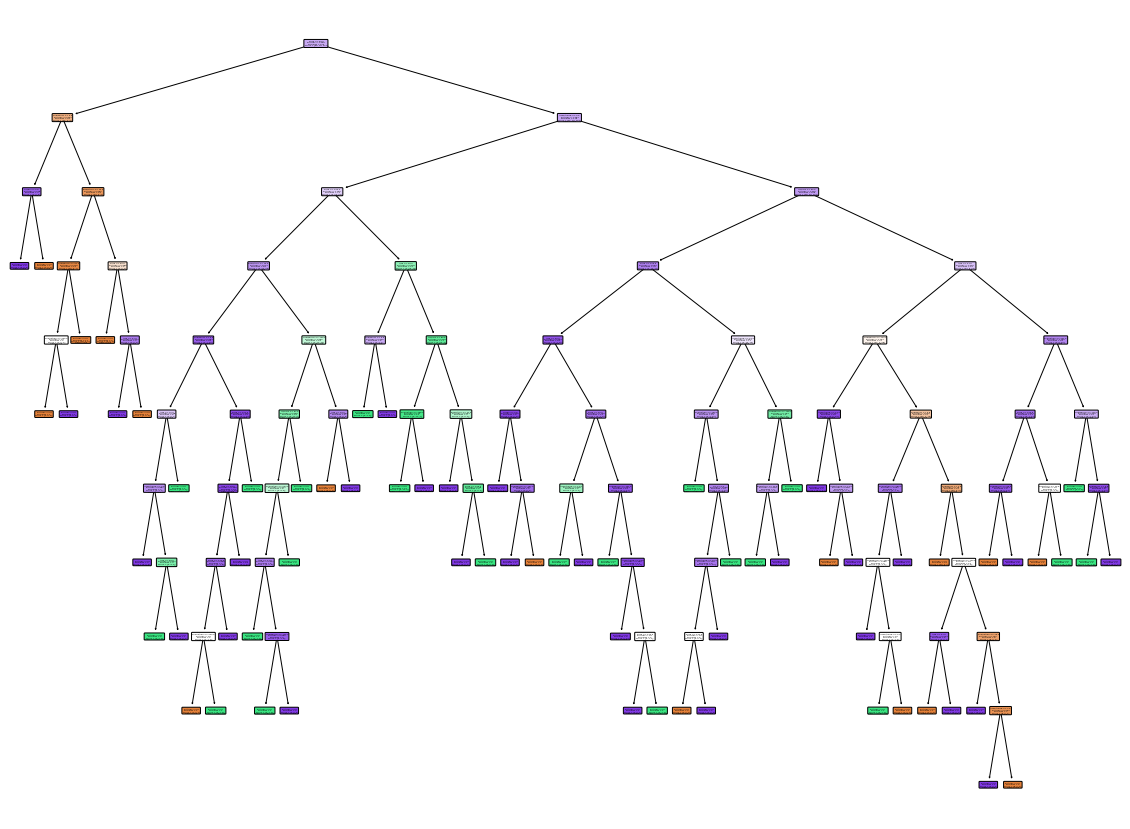

In [112]:
fig = plt.figure(figsize=(20, 15))

fn = ['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['low', 'moderate', 'high']

plot_tree(model.estimators_[0], 
          feature_names=fn,
          class_names=cn, 
          filled=True, impurity=True, 
          rounded=True)

In [113]:
# save as png file
fig.savefig('random_forest_companyData.png')